<a href="https://colab.research.google.com/github/muriloufu/ANN_2021/blob/main/TesteProjeto_01_FIE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from google.colab import files
#nao foi necessario a funcao do numpy
#o 'pd' vai ser usado para chamar o dataframe
#o 'plt' vai ser chamado para montar o grafico que relaciona valor observado e valor predito pela rede neural
#o 'files' chama o arquivo do computador
#MLPRegressor é o comando da rede neural
#meam_squared_error (MSE) e o r2_score sao parametros que auxiliam a julgar a qualidade da regressao que sera feita pela rede neural
#Objetivo: A partir de um dataset de 39 experimentos ajustar uma resposta de interesse: flux improvment efficiency (FIE)
#A funcao de ativaçao utilizada sera a tangenente hiperbolica (logistic)
#As inputs: X1 (inlet velocity)
#           X2 (Concentration)
#           X3 (TMP - Transmebrane Pressure)
#A output: FIE

In [ ]:
#selecao do dataset
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving Projeto01FIE.csv to Projeto01FIE (2).csv


In [ ]:
#colocar todo o dataset em um dataframe
df=pd.read_csv("Projeto01FIE.csv")

In [ ]:
df.head(39)

,Unnamed: 0,X1,X2,X3,Y
0,1,0.25,1,20,15.71
1,2,0.25,1,50,20.00
2,3,0.25,2,40,33.33
3,4,0.25,5,30,89.18
4,5,0.25,5,50,93.76
5,6,0.25,5,90,59.15
6,7,0.25,10,70,111.36
7,8,0.38,1,30,23.44
8,9,0.38,1,40,25.88
9,10,0.38,1,50,24.84


In [ ]:
#Retirada da coluna 0 do df e colocar no Dat_Select
Index=[1,2,3,4]
Dat_Select=[]
Dat_Select=df.iloc[:,Index].copy()
#Mosta o Dat_Select
Dat_Select.head(27)

,X1,X2,X3,Y
0,0.25,1,20,15.71
1,0.25,1,50,20.00
2,0.25,2,40,33.33
3,0.25,5,30,89.18
4,0.25,5,50,93.76
5,0.25,5,90,59.15
6,0.25,10,70,111.36
7,0.38,1,30,23.44
8,0.38,1,40,25.88
9,0.38,1,50,24.84


In [ ]:
# funcao normatiza dados - FUNCAO RETIRADA DO ARTIGO
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        x[i]=2*((x[i]-min_x)/(max_x-min_x))-1
    return x

In [ ]:
# funcao retorna os dados a forma original - xi ISOLADO DA FUNCAO NORMATIZA(X)
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        x[i]=((x[i]+1)/2)*(max_x-min_x)+min_x
    return x

In [ ]:
# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)
#Mosta o Dat_Select
Dat_Select.head(39)

,X1,X2,X3,Y
0,-1.00,-1.000000,-1.000000,-1.000000
1,-1.00,-1.000000,-0.142857,-0.951275
2,-1.00,-0.777778,-0.428571,-0.799875
3,-1.00,-0.111111,-0.714286,-0.165540
4,-1.00,-0.111111,-0.142857,-0.113521
5,-1.00,-0.111111,1.000000,-0.506616
6,-1.00,1.000000,0.428571,0.086376
7,-0.48,-1.000000,-0.714286,-0.912204
8,-0.48,-1.000000,-0.428571,-0.884491
9,-0.48,-1.000000,-0.142857,-0.896303


In [ ]:
#separa os dados em treino e teste
train=DAT.iloc[0:32,:]
#pegou 80% dos dados e randomizou e chamou de train
test=DAT.iloc[32:39:]
#o drop vai cortar o que foi pego no train e vai montar o test

In [ ]:
#obtem as variaveis independentes para o treino e para o teste
x_train=train.iloc[:,[0,1,2]]
x_test=test.iloc[:,[0,1,2]]
X_OLD=DAT_OLD.iloc[:,[0,1,2]]
#mostra as variaveis independentes de X do train
print(x_train)

      X1        X2        X3
0  -1.00 -1.000000 -1.000000
1  -1.00 -1.000000 -0.142857
2  -1.00 -0.777778 -0.428571
3  -1.00 -0.111111 -0.714286
4  -1.00 -0.111111 -0.142857
5  -1.00 -0.111111  1.000000
6  -1.00  1.000000  0.428571
7  -0.48 -1.000000 -0.714286
8  -0.48 -1.000000 -0.428571
9  -0.48 -1.000000 -0.142857
10 -0.48 -0.777778 -1.000000
11 -0.48  1.000000 -0.714286
12 -0.48  1.000000 -0.142857
13  0.00 -1.000000 -1.000000
14  0.00 -1.000000  0.142857
15  0.00 -1.000000  0.428571
16  0.00 -0.777778  0.428571
17  0.00 -0.111111 -1.000000
18  0.00 -0.111111  1.000000
19  0.00  1.000000 -0.428571
20  0.00  1.000000 -0.142857
21  0.52 -1.000000 -0.142857
22  0.52 -0.111111 -0.714286
23  0.76 -1.000000 -0.142857
24  1.00 -0.777778 -0.142857
25  1.00 -0.111111 -0.714286
26  1.00 -0.111111 -0.428571
27  1.00 -0.111111 -0.142857
28  1.00 -0.111111  0.428571
29  1.00 -0.111111  1.000000
30  1.00  1.000000 -0.714286
31  1.00  1.000000  0.428571


In [ ]:
#obtem as variaveis dependentes do treino e teste
Index=[3]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]
#Mostra as variaveis dependentes do train
print(y_train)

           Y
0  -1.000000
1  -0.951275
2  -0.799875
3  -0.165540
4  -0.113521
5  -0.506616
6   0.086376
7  -0.912204
8  -0.884491
9  -0.896303
10 -0.739565
11  0.525243
12  0.432790
13 -0.852235
14 -0.916293
15 -0.953546
16 -0.550116
17 -0.712420
18 -0.592254
19  0.667216
20  0.273780
21 -0.902663
22 -0.092055
23 -0.951275
24 -0.458232
25 -0.413936
26 -0.095917
27  0.173718
28 -0.156227
29 -0.152138
30  0.119541
31  1.000000


In [ ]:
#mostrar o X_test
print(x_test)

      X1        X2        X3
32 -0.48 -0.111111 -0.714286
33  0.00 -1.000000 -0.714286
34  0.00 -1.000000 -0.428571
35  0.00 -1.000000 -0.142857
36  0.00 -0.777778 -0.142857
37  0.00 -0.111111 -0.714286
38  0.52 -0.111111  0.428571


In [ ]:
#mostrar o y_test
print (y_test)

           Y
32 -0.125788
33 -0.870975
34 -0.845306
35 -0.859844
36 -0.498893
37 -0.015617
38  0.317962


In [ ]:
#define a rede neural
#nessa rede vao ser usados 3 camadas de neuronios: Input + hidden + output
#o numero de neuronios da output eh 1, porque tem 1 respostas (FIE)
#o numero de neuronios na hidden eh arbitrario. O artigo fez 12 neuronios nessa camada
#funcao de ativicao eh a logistic, segundo o artigo
model = MLPRegressor(solver='lbfgs',activation='logistic',alpha=1e-5,hidden_layer_sizes=(12),
                    random_state=1, max_iter=1000)
#o solver eh o lbfgs usado para metodos quasi-newton

In [ ]:
#treina a rede neural
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=12, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
#usa a rede neural treina em calculos para treino e teste
y_calc_train=model.predict(x_train)
y_calc_test=model.predict(x_test)

In [ ]:
#transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names

In [ ]:
#Desnormatizar os dados obtidos da rede neural
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)

In [ ]:
#recupera os dados originais 
test=[]
train=[]
train=Original(y_train,Y_OLD)
test=Original(y_test,Y_OLD)

In [ ]:
#Resposta para fazer o grafico (Eu-treino)
resist_obs_train=[]
resist_calc_train=[]
resist_calc_train=y_calc_train['Y'].copy()
resist_obs_train=train['Y'].copy()

In [ ]:
#Resposta para fazer o grafico (Eu-teste)
resist_obs_test=[]
resist_calc_test=[]
resist_calc_test=y_calc_test['Y'].copy()
resist_obs_test=test['Y'].copy()

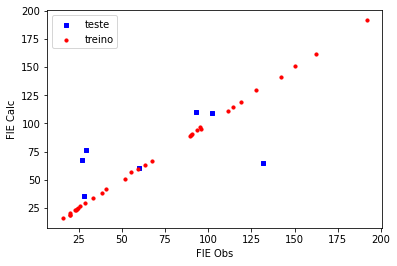

In [ ]:
#expressa os dois dados em figura - EULER
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('FIE Calc')
plt.xlabel('FIE Obs')
plt.show()

In [ ]:
#checar a qualidade da regressao PARA TESTE
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)

MSE teste= 1239.637012017318
R^2 teste= 0.1878909125081546


In [ ]:
#checar a qualidade da regressao PARA TREINO
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)

MSE treino= 0.4837113394816389
R^2 treino= 0.9997902201338074
